In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#
torch.__version__

'2.5.1+cu121'

In [ ]:
weight = 0.7
bais = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bais

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
train_splt = int(0.8 * len(X))
X_train, y_train = X[:train_splt], y[:train_splt]
X_test, y_test = X[train_splt:], y[train_splt:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  plt.figure(figsize=(10, 7))

 # Plot training date in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
 # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there prediciotions?
  if predictions is not None:
  # Plot the predictions if they don't exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 14})


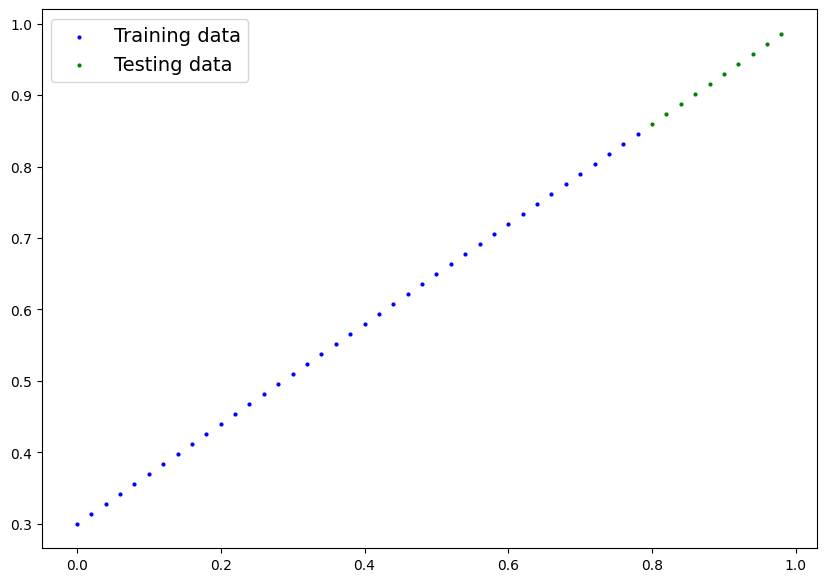

In [ ]:
plot_predictions();

In [ ]:
# First PyTorch model
class LineaRegressionModel(nn.Module): #<- aloms everything in PyTorch inherhits nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bais = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  # Make sure the forward function is correctly defined and indented
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- this is the forwad method or function
    return self.weights * x + self.bais #<- this is how the data flows throw the model.

In [ ]:
### PyTorch model building model essentials

# torch.nn
# torch.nn.Parameter
# torch.nn.Module
# torch.optim
# def forward

In [ ]:
# Create a random seed
torch.manual_seed(42)

#Create an instancce of the model
model_0 = LineaRegressionModel()

#Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [ ]:
weight,bais

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

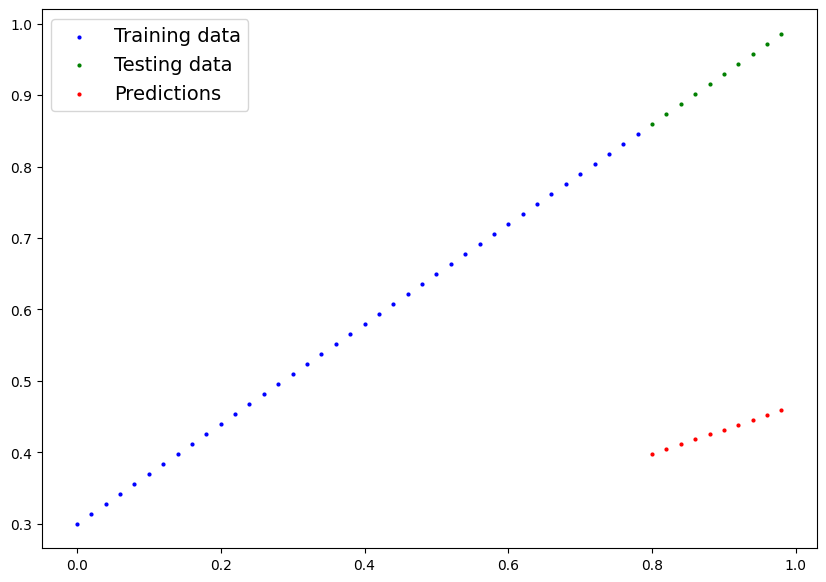

In [ ]:
plot_predictions(predictions=y_preds);
#

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_nn = nn.L1Loss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)



In [ ]:
from math import e
# Building a training loop

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Lopp trought the data
for epoch in range(epochs):
  model_0.train()
  # Set the model to training mode
  y_pred = model_0(X_train)

  # Calculate the loss
  loss = loss_nn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_nn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())


Epoch: 0 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bais', tensor([0.1488]))])
Epoch: 10 | Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bais', tensor([0.2488]))])
Epoch: 20 | Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bais', tensor([0.3403]))])
Epoch: 30 | Loss: 0.05181945487856865 | Test Loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bais', tensor([0.3788]))])
Epoch: 40 | Loss: 0.04503796249628067 | Test Loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bais', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04132963344454765 | Test Loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bais', tensor([0.3838]))])
Epoch: 60 | Loss: 0.03785243630409241 | Test Loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bais', tensor([0.3783]))

In [ ]:
import numpy as np

# Convert loss_values to a NumPy array
loss_values_np = np.array([loss.detach().cpu().numpy() for loss in loss_values])

# Convert test_loss_values to a NumPy array (if needed)
test_loss_values_np = np.array([loss.detach().cpu().numpy() for loss in test_loss_values])

loss_values_np, test_loss_values_np  # Output the NumPy arrays

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
        0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
        0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
       dtype=float32),
 array([0.4675942 , 0.33288422, 0.2069591 , 0.14023718, 0.11182952,
        0.09809747, 0.08776431, 0.07949176, 0.0719061 , 0.06363358,
        0.05536102, 0.04777536, 0.03950282, 0.03123028, 0.02364462,
        0.01537208, 0.00709954, 0.00844789, 0.00844789, 0.00844789],
       dtype=float32))

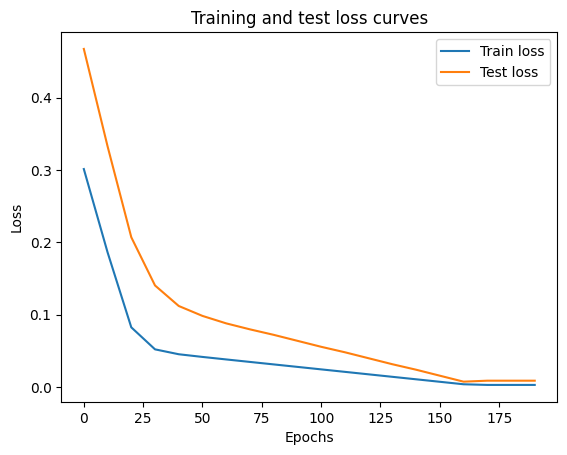

In [ ]:
plt.plot(epoch_count, [loss.detach().numpy() for loss in loss_values], label="Train loss")
plt.plot(epoch_count, [loss.detach().numpy() for loss in test_loss_values], label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


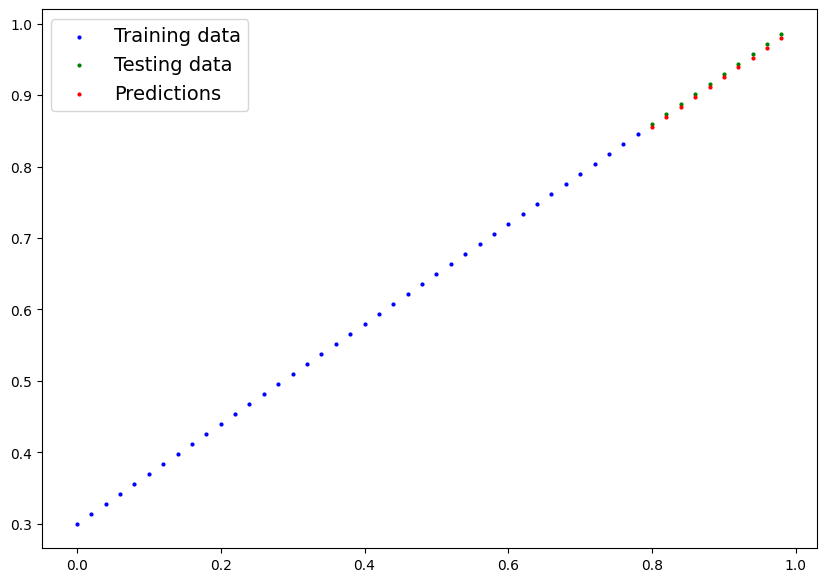

In [ ]:
plot_predictions(predictions=y_preds_new)
#

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
# Change 'precents' to 'parents'
MODEL_PATH.mkdir(parents=True, exist_ok=True) # Corrected the keyword argument
# The following will save the model when we get to that part.
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 17 20:18 models/01_pytorch_workflow_model_0.pth


In [ ]:
# Instantiate a new model
loaded_model_0 = LineaRegressionModel()

# Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model into evaluation mode
loaded_model_0.eval()



<ipython-input-62-cec5186f9675>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LineaRegressionModel()

In [ ]:
# Make predictions with the loaded model
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

# Verify that the predictions match
print(f"Loaded model predictions are equal to original model predictions: {torch.equal(y_preds_new, loaded_model_preds)}")

Loaded model predictions are equal to original model predictions: True


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
weight = 0.7
bais = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bais
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

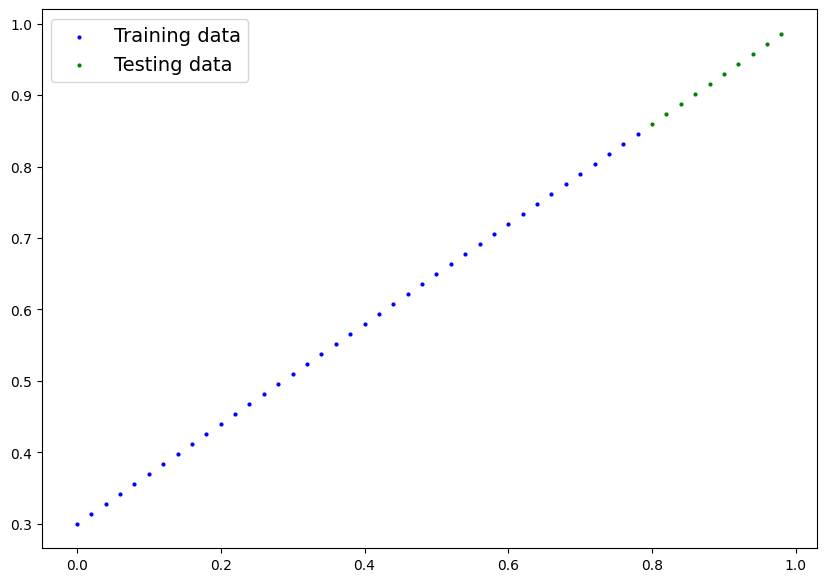

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Fix train_splt, X_train, y_train, X_test, y_test
train_splt = int(0.8 * len(X))
# Slice X to the split point, then slice y to the same point
X_train, y_train = X[:train_splt], y[:train_splt]
# slice X from the split point to the end, and slice y from the same split point to the end
X_test, y_test = X[train_splt:], y[train_splt:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Define the plot_predictions function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  plt.figure(figsize=(10, 7))

 # Plot training date in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
 # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there prediciotions?
  if predictions is not None:
  # Plot the predictions if they don't exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 14})


# Now call the function
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:

# Create a linear model by subclassing nn.Module

class LineaRegressionModelV2(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # Use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LineaRegressionModelV2()
model_1, model_1.state_dict()

(LineaRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Training
## Loss function
## Optimizer
## Trainig loop
## Testing loop

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr= 0.01)

In [ ]:
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

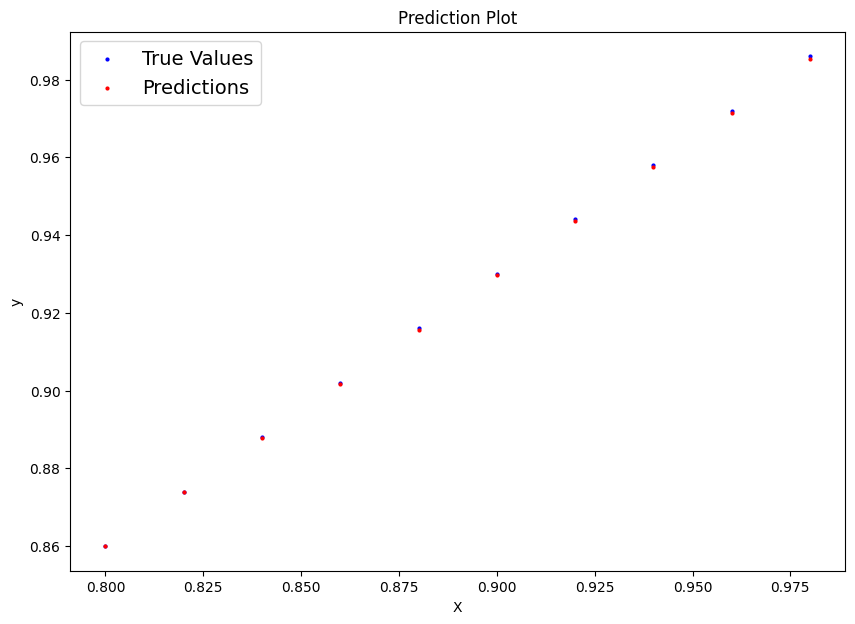

In [ ]:
# Make predictions with the trained model
with torch.inference_mode():
  y_preds = model_1(X_test)

# Convert predictions to NumPy for plotting
y_preds_np = y_preds.detach().cpu().numpy()

# Create the prediction plot
plt.figure(figsize=(10, 7))
plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c='b', s=4, label="True Values")  # True values in blue
plt.scatter(X_test.cpu().numpy(), y_preds_np, c='r', s=4, label="Predictions")  # Predictions in red
plt.xlabel("X")
plt.ylabel("y")
plt.title("Prediction Plot")
plt.legend(prop={'size': 14})
plt.show()

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True, exist_ok=True)

MODEL_NAME = "01_pytroch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"SAVING model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

SAVING model to: models/01_pytroch_workflow_model_1.pth


In [ ]:
# Instantiate a new instance of the LineaRegressionModelV2 class
loaded_model_1 = LineaRegressionModelV2()

# Load the saved state_dict into the instance
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))



<ipython-input-34-503af5dc023c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])